In [1]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

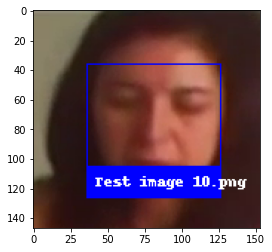

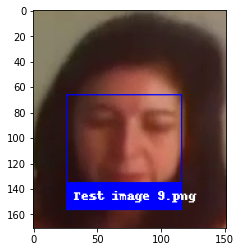

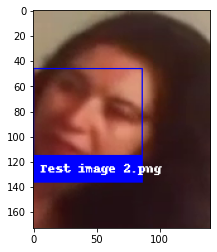

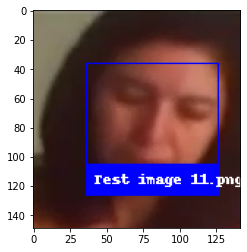

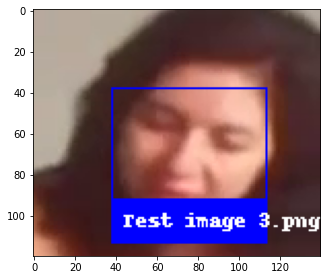

In [2]:
# Load a sample picture and learn how to recognize it.
trn_image = face_recognition.load_image_file("Screenshot_20200821-155329.png")
trn_face_encoding = face_recognition.face_encodings(trn_image)[0]
known_face_encodings = [trn_face_encoding,]

# all the testing pictures stored in a folder named "pictures"
pictures = os.listdir('/content/pictures')

# now we iterate for every training picture  
for picture in pictures:
  fig=plt.figure()
  # Load an image with an unknown face
  unknown_image = face_recognition.load_image_file("/content/pictures/" + picture) 
  # Create arrays of known face encodings and their names
  known_face_names = ["Test image " + picture,]

  # Find all the faces and face encodings in the unknown image
  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

  # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
  pil_image = Image.fromarray(unknown_image)
  # Create a Pillow ImageDraw Draw instance to draw with
  draw = ImageDraw.Draw(pil_image)

  # Loop through each face found in the unknown image
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    #now we use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

  # Remove the drawing library from memory as per the Pillow docs
  del draw
  # show the desired result of the image which is matched correctly 
  subplot_title=("Test images "+picture)
  plt.imshow(pil_image)

# to show all the matched images together
fig.tight_layout()    
plt.show()